# Logistic Regression Problem 01

### Problem: Predicting Employee Attrition (Whether an Employee Will Leave the Company or Not)

**Step 1: Generate the Dataset**

In [1]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_samples = 200  # Number of employees

# Features
age = np.random.randint(22, 60, n_samples)                  # Age between 22 and 60
job_satisfaction = np.random.randint(1, 5, n_samples)       # Job Satisfaction rating from 1 to 4
years_at_company = np.random.randint(1, 15, n_samples)      # Years at the company from 1 to 15
distance_from_home = np.random.randint(1, 40, n_samples)    # Distance from home in km

# Target variable: Attrition (1 = Yes, 0 = No)
attrition = (years_at_company < 5) & (job_satisfaction < 3) & (distance_from_home > 15)
attrition = attrition.astype(int)

# Create the DataFrame
employee_data = pd.DataFrame({
    'Age': age,
    'JobSatisfaction': job_satisfaction,
    'YearsAtCompany': years_at_company,
    'DistanceFromHome': distance_from_home,
    'Attrition': attrition
})

# Check the first few rows of the dataset
print(employee_data.head())


   Age  JobSatisfaction  YearsAtCompany  DistanceFromHome  Attrition
0   50                4               4                18          0
1   36                4               1                39          0
2   29                3               8                32          0
3   42                2              14                24          0
4   40                4              14                23          0


**Step 2: Explore the Data**

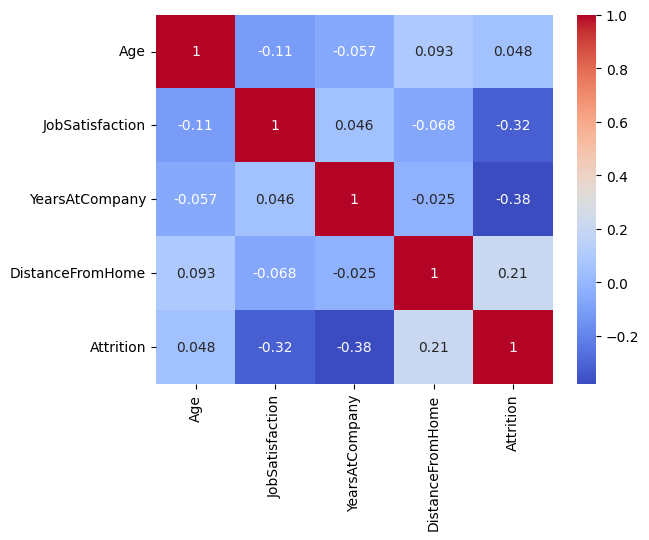

Attrition
0    182
1     18
Name: count, dtype: int64


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize correlations with a heatmap
sns.heatmap(employee_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Check attrition rate
print(employee_data['Attrition'].value_counts())


**Step 3: Prepare the Data for Training**

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target variable
X = employee_data[['Age', 'JobSatisfaction', 'YearsAtCompany', 'DistanceFromHome']]
y = employee_data['Attrition']

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Step 4: Train the Logistic Regression Model**

In [4]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

**Step 5: Evaluate the Model**

Accuracy: 0.9
Precision: 0.6666666666666666
Recall: 0.4


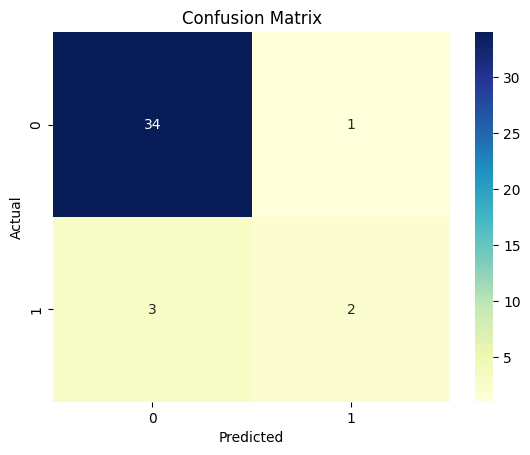

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Step 6: Interpret the Results**

The output of the model will show:

1. Accuracy: The proportion of correctly classified cases among all cases.
2. Precision: The proportion of true positives among the cases the model predicted as positives.
3. Recall: The proportion of true positives identified out of all actual positive cases.
4. Confusion Matrix: A matrix that shows the counts of true positives, true negatives, false positives, and false negatives. It helps visualize the model’s effectiveness in classifying each case.

In [6]:
attrition_rate = employee_data['Attrition'].mean() * 100
print("Overall Attrition Rate in Dataset: {:.2f}%".format(attrition_rate))

Overall Attrition Rate in Dataset: 9.00%


In [7]:
# Get predicted attrition percentage in the test set
predicted_attrition_rate = y_pred.mean() * 100
print("Predicted Attrition Rate in Test Set: {:.2f}%".format(predicted_attrition_rate))

Predicted Attrition Rate in Test Set: 7.50%
